In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
marc_anne_data = pd.read_csv("data_delta_pas.csv", sep=",")

In [7]:
marc_anne_data.head()

,ms_mmHg,Mean_RR__ms_,pNN50__perc_,SDNN__ms_,rMSSD__ms_,Ptot__mstwo_,VLF__mstwo_,LF__mstwo_,HF__mstwo_,LF_HF,...,twoUVperc,MP,MPperc,αone__DFA_,αtwo__DFA_,H__DFA_,H__Higuchi_,H__Katz_,Hurst,Delta_PAS
0,3.493,890,0.30,26.7,20.1,314.62,103.33,107.520,43.01,2.50,...,42.04,155,46.55,0.852,0.917,1.108,1.933,1.935,0.089,40
1,2.866,770,0.00,13.0,7.7,162.24,107.36,21.600,19.38,1.11,...,16.30,172,47.51,1.059,1.152,1.076,1.850,1.452,0.220,28
2,5.445,777,0.52,15.4,13.6,125.40,42.87,18.080,33.09,0.55,...,25.07,131,34.20,0.776,0.993,0.949,1.937,1.635,0.101,27
3,7.548,980,1.66,25.8,18.5,993.47,373.49,470.397,135.76,3.47,...,17.06,194,64.88,0.972,1.105,0.943,1.798,1.835,0.233,30
4,1.847,875,0.00,10.7,3.6,87.58,41.63,24.430,5.41,4.51,...,7.94,181,53.24,1.441,1.224,1.107,1.543,1.225,0.408,16


In [8]:

# If column names have special characters (e.g., / or -), rename them
marc_anne_data.columns = marc_anne_data.columns.str.replace("-", "_").str.replace("/", "_")


In [9]:
marc_anne_data

,ms_mmHg,Mean_RR__ms_,pNN50__perc_,SDNN__ms_,rMSSD__ms_,Ptot__mstwo_,VLF__mstwo_,LF__mstwo_,HF__mstwo_,LF_HF,...,twoUVperc,MP,MPperc,αone__DFA_,αtwo__DFA_,H__DFA_,H__Higuchi_,H__Katz_,Hurst,Delta_PAS
0,3.493,890,0.30,26.7,20.1,314.62,103.33,107.520,43.01,2.50,...,42.04,155,46.55,0.852,0.917,1.108,1.933,1.935,0.089,40
1,2.866,770,0.00,13.0,7.7,162.24,107.36,21.600,19.38,1.11,...,16.30,172,47.51,1.059,1.152,1.076,1.850,1.452,0.220,28
2,5.445,777,0.52,15.4,13.6,125.40,42.87,18.080,33.09,0.55,...,25.07,131,34.20,0.776,0.993,0.949,1.937,1.635,0.101,27
3,7.548,980,1.66,25.8,18.5,993.47,373.49,470.397,135.76,3.47,...,17.06,194,64.88,0.972,1.105,0.943,1.798,1.835,0.233,30
4,1.847,875,0.00,10.7,3.6,87.58,41.63,24.430,5.41,4.51,...,7.94,181,53.24,1.441,1.224,1.107,1.543,1.225,0.408,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.905,658,0.00,12.4,10.3,129.68,87.46,9.940,4.79,2.07,...,39.74,135,29.80,0.703,1.220,1.154,1.948,1.531,0.114,42
100,2.138,874,0.00,11.1,6.7,150.65,90.11,32.690,12.68,2.58,...,15.29,161,47.35,1.133,1.100,0.996,1.758,1.397,0.242,6
101,10.956,990,7.31,30.1,34.5,497.90,69.03,173.680,163.69,1.06,...,4.35,194,64.88,1.030,0.685,0.603,1.915,1.987,0.071,24
102,5.589,743,0.74,26.2,15.9,835.28,404.84,374.620,28.00,13.38,...,5.99,184,45.89,1.611,0.921,0.866,1.510,1.617,0.406,52


In [10]:
# Drop rows with missing values
marc_anne_data = marc_anne_data.dropna()

In [11]:
marc_anne_data.shape

(104, 51)

In [12]:
# Clean column names
marc_anne_data.columns = marc_anne_data.columns.str.replace(r"[-/()%²]", "_", regex=True)
marc_anne_data.columns = marc_anne_data.columns.str.replace("1", "one").str.replace("2", "two").str.replace("%", "perc")

In [13]:
# Standardize numeric columns
scaler = StandardScaler()
numeric_cols = marc_anne_data.select_dtypes(include=np.number).columns
marc_anne_data[numeric_cols] = scaler.fit_transform(marc_anne_data[numeric_cols])

In [14]:
# Split the data into predictors (X) and target (y)
X = marc_anne_data.drop(columns=['Delta_PAS'])
y = marc_anne_data['Delta_PAS']

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train.head()

,ms_mmHg,Mean_RR__ms_,pNN50__perc_,SDNN__ms_,rMSSD__ms_,Ptot__mstwo_,VLF__mstwo_,LF__mstwo_,HF__mstwo_,LF_HF,...,twoUV,twoUVperc,MP,MPperc,αone__DFA_,αtwo__DFA_,H__DFA_,H__Higuchi_,H__Katz_,Hurst
103,0.474777,-0.140424,-0.323788,-0.710871,-0.166932,-0.537317,-0.600816,-0.399462,-0.248468,-0.442145,...,1.540182,1.414094,-1.042879,-0.836421,-1.133641,-1.221181,-0.672816,1.134479,-0.021348,-1.237438
78,-0.493696,-0.738082,-0.300538,-0.888994,-0.539206,-0.510315,-0.510623,-0.446899,-0.204893,-0.721232,...,-0.647628,-0.713321,1.261570,0.255599,-0.449070,0.255785,-0.185342,-0.354450,-0.646847,0.177190
28,0.254496,0.119847,0.042402,-0.049269,0.299887,-0.153111,-0.032789,-0.322675,-0.107879,-0.675880,...,0.892769,0.894703,-0.992782,-0.619548,-0.768935,-0.263588,-0.131178,0.833148,0.405614,-0.951503
79,-0.757504,-0.294658,-0.323788,-0.151054,-0.568751,-0.263535,-0.149969,-0.067878,-0.286295,1.888231,...,-1.317366,-1.285777,0.760603,0.244117,1.766070,0.196273,-0.456161,-2.534668,-0.629769,2.750610
5,-0.783385,1.035614,-0.323788,-0.439444,-0.421024,-0.429655,-0.312901,-0.446040,-0.261439,-0.525871,...,-0.469031,-0.279958,-0.291428,0.629386,-0.218887,1.813902,0.512017,0.017782,-0.437636,0.132043


In [17]:
# 1. Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Feature importance
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


In [18]:
# 2. Support Vector Machines (SVM)
svm_model = SVR(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)


In [19]:
# 3. Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(30,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)


In [20]:
#Print Results
print("Random Forest: MSE = {:.3f}, R^2 = {:.3f}".format(rf_mse, rf_r2))
print("Support Vector Machine: MSE = {:.3f}, R^2 = {:.3f}".format(svm_mse, svm_r2))
print("Neural Network: MSE = {:.3f}, R^2 = {:.3f}".format(nn_mse, nn_r2))


Random Forest: MSE = 0.923, R^2 = 0.006
Support Vector Machine: MSE = 0.903, R^2 = 0.027
Neural Network: MSE = 2.537, R^2 = -1.734


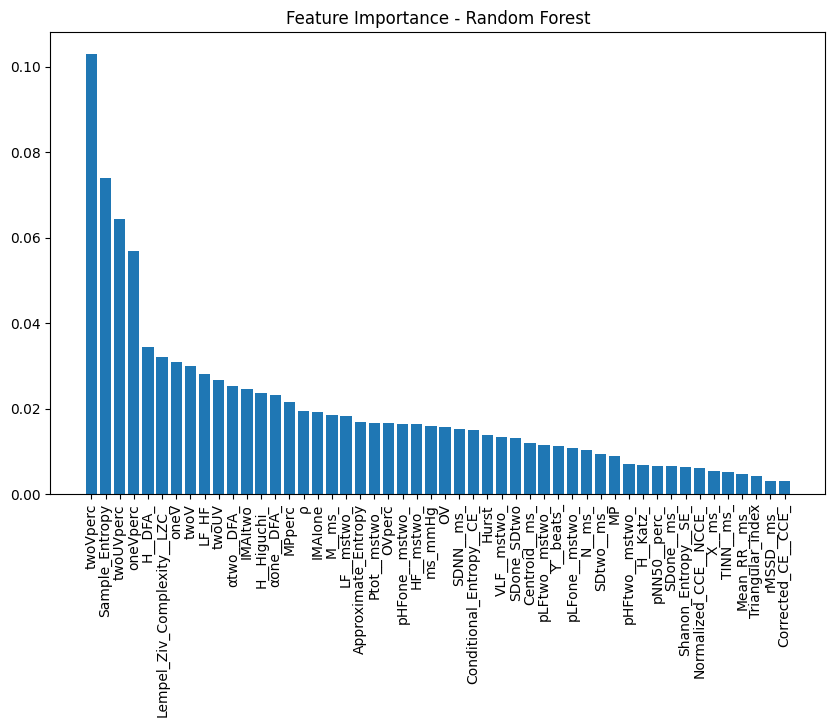

In [21]:
# Plot feature importance for Random Forest
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance - Random Forest')
plt.show()

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ensure TensorFlow is installed and working
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.17.1


In [23]:
# Neural Network using TensorFlow/Keras
def build_and_train_nn(X_train, X_test, y_train, y_test):
    # Define the model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # 1st hidden layer
        Dropout(0.2),  # Dropout to prevent overfitting
        Dense(64, activation='relu'),  # 2nd hidden layer
        Dropout(0.2),  # Dropout to prevent overfitting
        Dense(32, activation='relu'),  # 3rd hidden layer
        Dropout(0.2),
        Dense(1, activation='linear')  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=1000,
        batch_size=32,
        verbose=1
    )

    # Evaluate the model
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Neural Network: MSE = {mse:.3f}, R^2 = {r2:.3f}")

    # Plot training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Return the trained model and predictions
    return model, y_pred


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 1.3039 - mae: 0.8779 - val_loss: 0.7671 - val_mae: 0.7134
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.9629 - mae: 0.7574 - val_loss: 0.7409 - val_mae: 0.7093
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.0631 - mae: 0.7818 - val_loss: 0.7393 - val_mae: 0.7264
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0429 - mae: 0.8113 - val_loss: 0.7407 - val_mae: 0.7335
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0490 - mae: 0.7110 - val_loss: 0.7470 - val_mae: 0.7431
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7551 - mae: 0.6571 - val_loss: 0.7703 - val_mae: 0.7601
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1288 - mae: 0.7950 - val_loss: 0.7975 - val_mae: 0.7767
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.9636 - mae: 0.7050 - val_loss: 0.8218 - val_mae: 0.7931
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.9600 - mae: 0.7

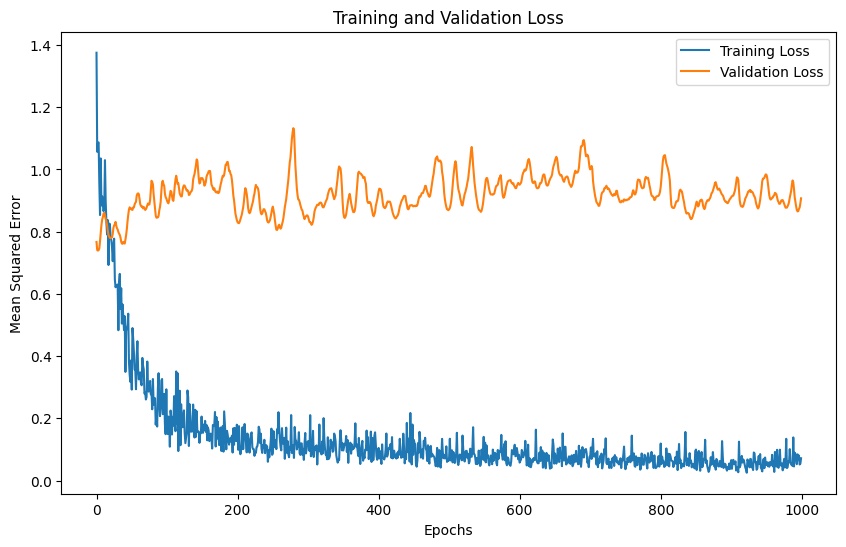

In [24]:

# Train the model
nn_model, nn_predictions = build_and_train_nn(X_train, X_test, y_train, y_test)


In [26]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [27]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score

# Define the model building function
def build_nn_model(hp):
    model = Sequential()
    # Input Layer
    model.add(Dense(
        units=hp.Int('units_input', min_value=32, max_value=128, step=32),
        activation='relu', input_shape=(X_train.shape[1],)
    ))
    # Hidden Layers
    for i in range(hp.Int('num_layers', 1, 5)):  # Vary number of hidden layers
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    # Output Layer
    model.add(Dense(1, activation='linear'))  # Regression output
    # Compile Model
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
        loss='mse', metrics=['mae']
    )
    return model

In [28]:

# Hyperparameter tuner
tuner = kt.RandomSearch(
    build_nn_model,
    objective='val_loss',
    max_trials=10,  # Number of models to try
    executions_per_trial=2,  # Average over multiple runs
    directory='my_dir',
    project_name='tune_nn'
)

# Run the search
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Optimal Number of Layers: {best_hps.get('num_layers')}
Optimal Units in Input Layer: {best_hps.get('units_input')}
Dropout Rate: {best_hps.get('dropout')}
Optimizer: {best_hps.get('optimizer')}
""")

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=1)

# Evaluate on test set
y_pred = best_model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Neural Network: MSE = {mse:.3f}, R^2 = {r2:.3f}")


Trial 10 Complete [00h 00m 15s]
val_loss: 0.68460813164711

Best val_loss So Far: 0.6627927124500275
Total elapsed time: 00h 02m 16s

Optimal Number of Layers: 1
Optimal Units in Input Layer: 32
Dropout Rate: 0.5
Optimizer: rmsprop

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - loss: 1.7784 - mae: 1.0732 - val_loss: 0.7819 - val_mae: 0.7549
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.5503 - mae: 0.9085 - val_loss: 0.7410 - val_mae: 0.7141
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.3847 - mae: 0.8849 - val_loss: 0.7280 - val_mae: 0.6986
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.2488 - mae: 0.8334 - val_loss: 0.8066 - val_mae: 0.7813
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.2618 - mae: 0.8185 - val_loss: 0.8597 - val_mae: 0.8167
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.4852 - mae: 0.9786 - val_loss: 0.8371 - val_mae: 0.8077
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.2426 - mae: 0.8276 - val_loss: 0.8645 - val_mae: 0.8224
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9866 - mae: 0.7632 - val_loss: 0.8993 - val_mae: 0.8451
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8770 - mae: 0.6972 - va

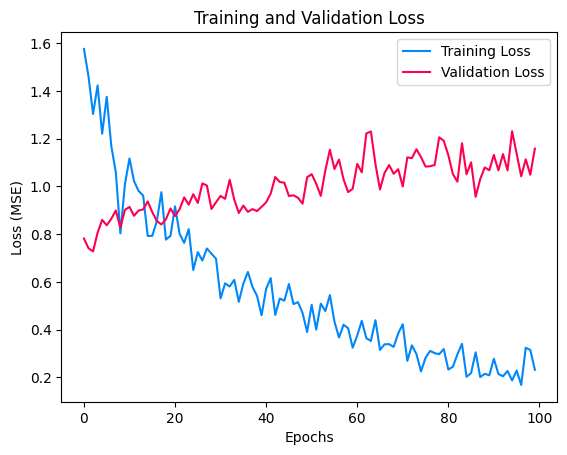

In [29]:
import matplotlib.pyplot as plt



# RGB values for light blue and light pink
light_blue = (0/255, 135/255, 250/255)  # Light blue: RGB(0, 135, 250)
light_pink = (255/255, 0/255, 79/255)  # Light pink: RGB(255, 0, 79)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color=light_blue)
plt.plot(history.history['val_loss'], label='Validation Loss',  color=light_pink)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


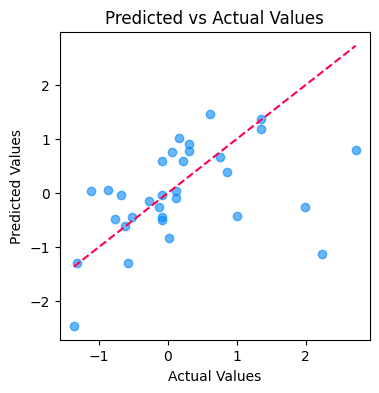

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# RGB values for light blue and light pink
light_blue = (0/255, 135/255, 250/255)  # Light blue: RGB(0, 135, 250)
light_pink = (255/255, 0/255, 79/255)  # Light pink: RGB(255, 0, 79)

# Predicted vs Actual values
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.6, color=light_blue)  # Scatter plot with blue dots
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color=light_pink)  # Line of perfect prediction in pink
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 4/32 [00:00<?, ?it/s]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 6/32 [00:11<00:13,  1.97it/s]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 7/32 [00:12<00:18,  1.36it/s]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 8/32 [00:13<00:20,  1.17it/s]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 9/32 [00:14<00:22,  1.03it/s]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  31%|███▏      | 10/32 [00:15<00:24,  1.12s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  34%|███▍      | 11/32 [00:17<00:27,  1.30s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 12/32 [00:19<00:26,  1.34s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 13/32 [00:20<00:24,  1.30s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 14/32 [00:21<00:23,  1.32s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  47%|████▋     | 15/32 [00:22<00:21,  1.27s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 16/32 [00:23<00:19,  1.25s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 17/32 [00:25<00:18,  1.22s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  56%|█████▋    | 18/32 [00:26<00:16,  1.20s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 19/32 [00:27<00:16,  1.25s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  62%|██████▎   | 20/32 [00:29<00:15,  1.31s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  66%|██████▌   | 21/32 [00:30<00:15,  1.43s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 22/32 [00:32<00:14,  1.43s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  72%|███████▏  | 23/32 [00:33<00:11,  1.32s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  75%|███████▌  | 24/32 [00:34<00:09,  1.24s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 25/32 [00:35<00:08,  1.24s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  81%|████████▏ | 26/32 [00:36<00:07,  1.28s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 27/32 [00:38<00:06,  1.32s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 28/32 [00:39<00:05,  1.27s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 29/32 [00:40<00:03,  1.24s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 30/32 [00:42<00:02,  1.30s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  97%|█████████▋| 31/32 [00:43<00:01,  1.44s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer: 100%|██████████| 32/32 [00:45<00:00,  1.44s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer: 33it [00:46,  1.61s/it]


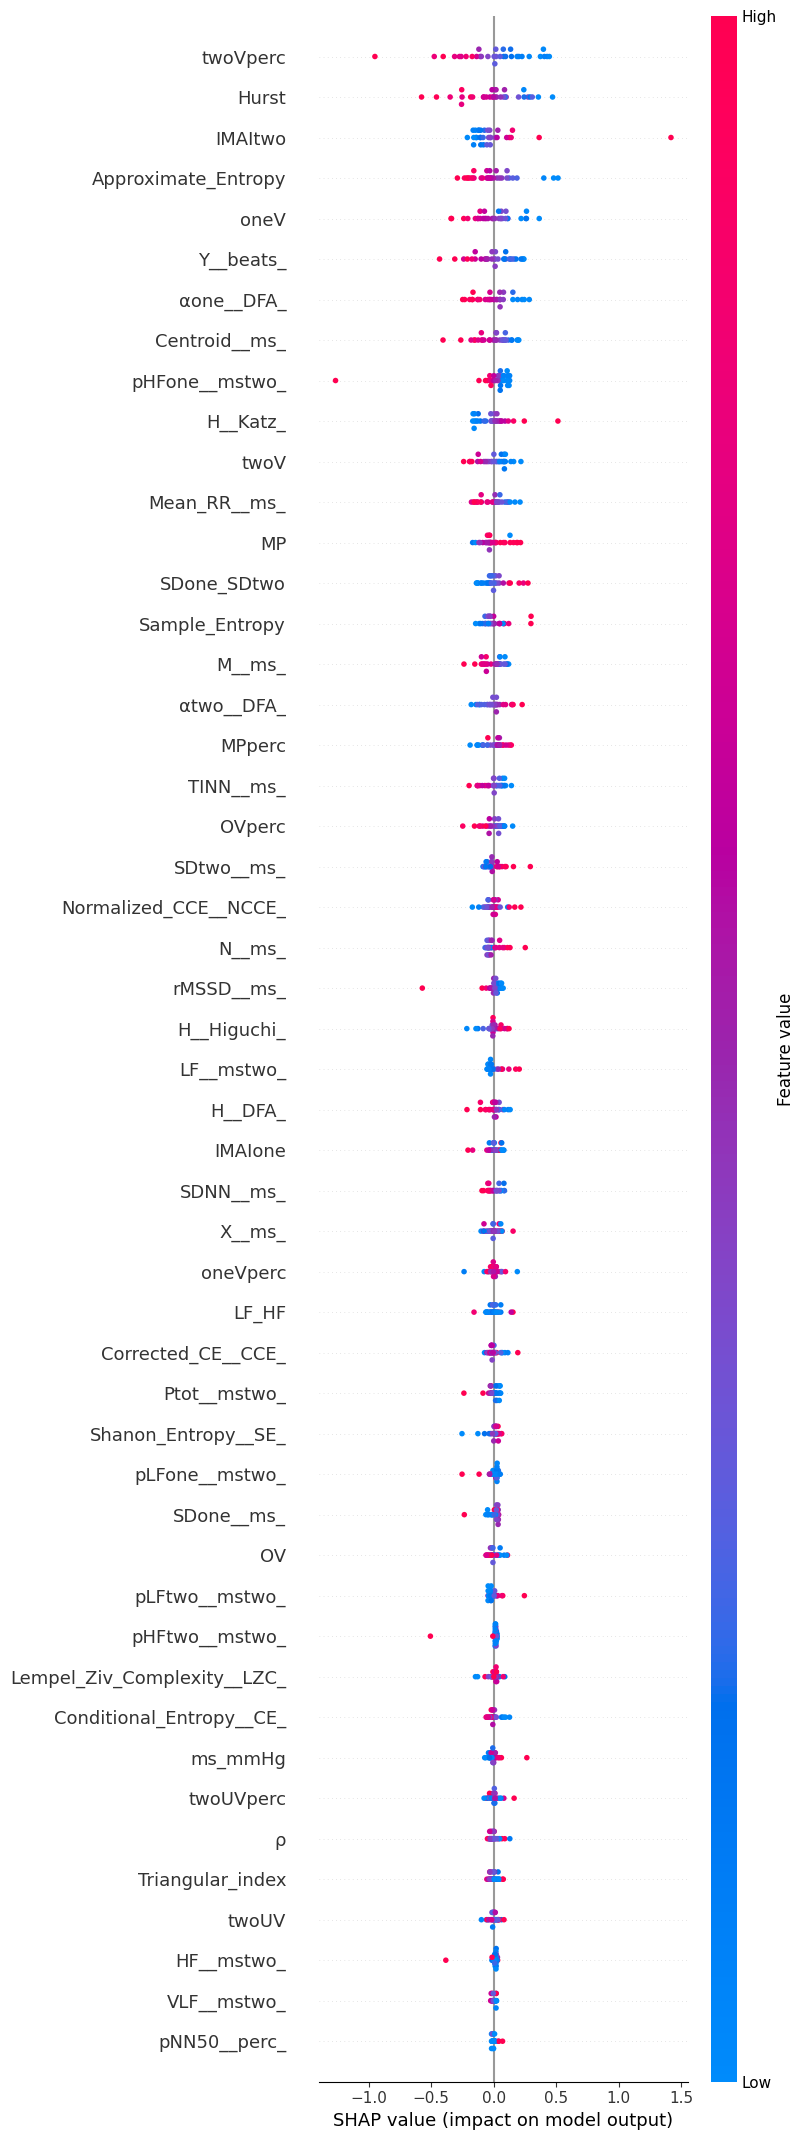

In [31]:
import shap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Initialize SHAP explainer
explainer = shap.Explainer(best_model.predict, X_test)
shap_values = explainer(X_test)

# Define the custom color palette from midnight blue to dark red
colors = ["midnightblue", "darkred"]
cmap = mcolors.LinearSegmentedColormap.from_list("blue_to_red", colors)


# Summary plot

shap.summary_plot(shap_values, X_test, max_display=50, color=plt.get_cmap("RdBu"))


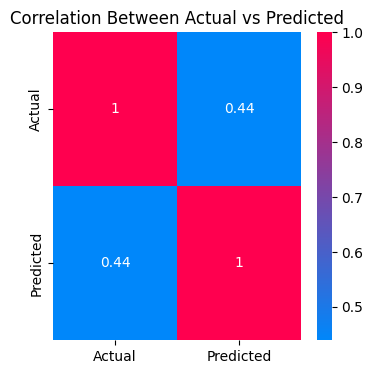

In [32]:
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Define the custom RGB colors for light blue and pink
light_blue = (0/255, 135/255, 250/255)  # RGB (0, 135, 250)
pink = (255/255, 0/255, 79/255)        # RGB (255, 0, 79)

# Create the colormap using the specified colors
cmap = LinearSegmentedColormap.from_list('lightblue_to_pink', [light_blue, pink])


# Correlation heatmap
plt.figure(figsize=(4, 4))

sns.heatmap(results.corr(), annot=True, cmap=cmap)
plt.title('Correlation Between Actual vs Predicted')
plt.show()


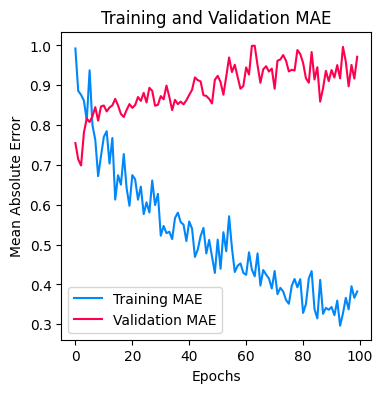

In [33]:
import matplotlib.pyplot as plt

# RGB values for light blue and light pink
light_blue = (0/255, 135/255, 250/255)  # Light blue: RGB(0, 135, 250)
light_pink = (255/255, 0/255, 79/255)  # Light pink: RGB(255, 0, 79)

plt.figure(figsize=(4, 4))
plt.plot(history.history['mae'], label='Training MAE', color=light_blue)
plt.plot(history.history['val_mae'], label='Validation MAE', color=light_pink)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()


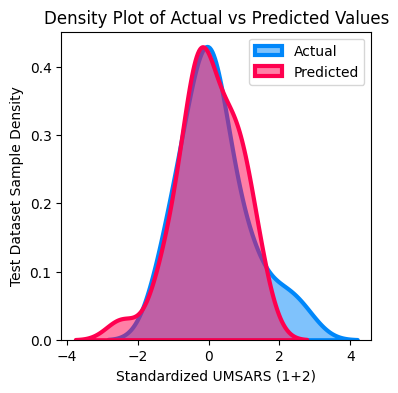

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom RGB colors for light blue and pink
light_blue = (0/255, 135/255, 250/255)  # RGB (0, 135, 250)
pink = (255/255, 0/255, 79/255)        # RGB (255, 0, 79)

# Density plot for actual and predicted values
plt.figure(figsize=(4, 4))
sns.kdeplot(y_test, label='Actual', color=light_blue, linewidth=3,fill=True, alpha=0.5)
sns.kdeplot(y_pred, label='Predicted', color=pink, linewidth=3,fill=True, alpha=0.5)
plt.legend()
plt.title('Density Plot of Actual vs Predicted Values')
plt.xlabel('Standardized UMSARS (1+2)')
plt.ylabel('Test Dataset Sample Density')
plt.show()


In [35]:
best_model.save("best_model.h5")

In [36]:
model_json = best_model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
best_model.save_weights("model.weights.h5")

In [37]:
X_test.shape

(32, 50)

In [38]:
X_train.shape

(72, 50)